In [57]:
import numpy as np
import pandas as pd
import sklearn as sk
from matplotlib import pyplot as plt

In [58]:
df = pd.read_csv('data.csv')
df.drop(columns=['ID'], inplace=True)
df.reset_index(drop=True)
df.sample(5)

,age,gender,bmi,children,smoker,region,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD)
1296,43.000000,male,30.100000,1,-,southwest,Engaged,Construction,Lightly Active,9.5,Poor,22088.860000,6849.026000
1146,41.423510,male,30.049060,2,yes,northwest,Married,Management,Sedentary,9.2,Poor,-26552.683671,20994.871722
2807,43.000000,female,26.700000,2,yes,southwest,Married,IT Support,Sedentary,5.8,Fair,56196.500000,22478.600000
1749,40.639884,female,20.227546,1,no,southeast,Engaged,Management,Moderately Active,8.0,Poor,74019.625802,13224.761501
2416,47.000000,female,24.100000,1,no,southwest,Engaged,IT Support,Sedentary,2.9,Fair,203689.400000,26236.579970


In [59]:
df.describe()

,age,bmi,children,stress_level,income (USD),charges (USD)
count,3098.000000,3067.000000,3098.000000,3098.000000,3098.000000,3075.000000
mean,39.093165,32.163444,1.118786,6.414526,62360.722112,13476.771230
std,14.133351,99.325991,1.207859,1.721550,64646.475643,12080.919557
min,-8.000000,-989.915959,-3.000000,0.000000,-126055.018185,1000.000000
25%,27.000000,26.315000,0.000000,5.200000,20236.880000,4718.863800
50%,39.000000,30.495000,1.000000,6.400000,41783.988014,9644.252500
75%,51.000000,34.800000,2.000000,7.600000,83888.017500,17807.613070
max,88.336729,5424.864393,5.000000,10.000000,528054.020000,63770.428010


In [60]:
print(f'smoker: {df.smoker.unique()}')
print(f'gender: {df.gender.unique()}')
print(f'region: {df.region.unique()}')
print(f'status: {df.status.unique()}')
print(f'work sector: {df.work_sector.unique()}')
print(f'sleep quality: {df.sleep_quality.unique()}')
print(f'physical activity: {df.physical_activity.unique()}')

smoker: ['no' 'yes' '-' 'DFH']
gender: ['female' 'male']
region: ['southwest' 'northwest' 'southeast' 'northeast']
status: ['Single' 'Engaged' 'Married' 'Single-Parent' 'CDE' 'ABC' nan]
work sector: ['Education' 'IT Support' 'Transportation' 'Hospitality' 'Unemployed'
 'Healthcare Support' 'Retail' 'Entrepreneur' 'Finance' 'Construction'
 'Retail Management' 'Healthcare' 'Law' 'Management' 'Self-Employed' 'IT'
 nan 'Engineering' 'Wizardry' 'Interdimensional Trade']
sleep quality: ['Fair' 'Poor' 'Good' 'Excellent' 'CDE']
physical activity: ['Lightly Active' 'Sedentary' 'Very Active' 'Moderately Active' nan
 'video-gamer']


In [61]:
mask = (df['status'] == 'ABC') | (df['status'] == 'CDE') | (df['sleep_quality'] == 'CDE') | (
        df['physical_activity'] == 'video-gamer')
df[mask]
# drop those 3 as they make no sense and ~0.1% of dataset
# all of them have 2 'corrupted' features

,age,gender,bmi,children,smoker,region,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD)
36,32.027049,male,32.316381,-3,no,southeast,Married,Construction,Moderately Active,5.3,CDE,9390.753386,10412.900531
573,22.632769,male,-989.915959,0,no,northwest,CDE,Healthcare Support,Lightly Active,2.0,Excellent,98023.266602,22486.448061
639,44.676202,male,27.186491,0,yes,southeast,ABC,Wizardry,video-gamer,4.9,Good,85887.492717,14737.870783


In [62]:
df = df[~mask]
df.reset_index(drop=True)

,age,gender,bmi,children,smoker,region,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD)
0,45.0,female,25.700,3,no,southwest,Single,Education,Lightly Active,6.9,Fair,44324.35,9101.79800
1,32.0,male,28.120,4,yes,northwest,Engaged,IT Support,Sedentary,6.9,Poor,102553.91,21472.47880
2,41.0,female,37.100,2,-,southwest,Single,Transportation,Very Active,5.9,Fair,18429.43,7371.77200
3,26.0,male,31.065,0,no,northwest,Single,Education,Sedentary,5.9,Fair,14888.09,2699.56835
4,23.0,female,34.960,3,no,northwest,Married,Hospitality,Sedentary,8.6,Good,15571.19,4466.62140
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,54.0,male,34.210,2,yes,southeast,Married,Finance,Lightly Active,9.2,Poor,336130.93,44260.74990
3091,18.0,female,31.350,4,no,northeast,Single,Retail,Sedentary,10.0,Poor,21624.45,4561.18850
3092,39.0,female,23.870,5,no,southeast,Single,Transportation,Lightly Active,5.8,Good,36357.70,8582.30230
3093,58.0,male,25.175,0,no,northeast,Single,Education,Lightly Active,4.7,Poor,69475.40,11931.12525


let's encode features:
- gender to boolean 'is_male'
- smoker oneHot (smoking, not smoking, unknown)
- region oneHot
- status oneHot (later after imputation)
- work_sector oneHot (later after imputation)
- sleep_quality numerical (as it's ordinal Poor -> Excellent)
- physical_activity numerical (as it's ordinal Sedentary -> Very Active)

In [63]:
print(f'{(df.children < 0).sum()} negative children rows')
df[(df.age < 18)]

1 negative children rows


,age,gender,bmi,children,smoker,region,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD)
87,15.123557,female,30.360872,0,no,southeast,Single,Retail,Lightly Active,6.3,Poor,87861.868595,12864.070934
229,15.727649,female,41.854735,3,no,southeast,Married,IT,Moderately Active,4.5,Poor,140960.706083,46680.037223
306,15.168302,female,33.939556,0,yes,southwest,Engaged,Retail Management,Moderately Active,6.7,Fair,111189.507135,2495.923471
450,6.190668,female,22.324037,1,no,southeast,Married,Hospitality,Sedentary,1.8,Excellent,865.951745,5679.525258
454,13.329776,male,31.931234,3,yes,northwest,Single,Healthcare,Sedentary,7.3,Poor,86474.198292,29890.117369
482,2.374126,female,26.686038,1,no,northwest,Single,Finance,Moderately Active,6.5,Fair,101398.371162,27999.218508
695,2.879041,female,28.338212,2,yes,southwest,Single,Finance,Lightly Active,9.1,Poor,148958.692649,37556.610697
789,15.834161,male,38.075766,1,no,northwest,Single,Healthcare,Lightly Active,8.1,Poor,7890.258501,17332.663693
871,12.526339,female,26.256683,2,no,northwest,Married,Management,Moderately Active,4.3,Fair,143381.792011,3256.099146
882,10.592705,male,31.844211,0,yes,northeast,Married,Hospitality,Lightly Active,6.2,Poor,20342.800913,23619.942885


only one with negative children, let's just set it to 0

those values of age make no sense (married or with children at <18...)

let's drop those with nan, and later impute them

In [64]:
df.smoker = df.smoker.apply(lambda x: 'smoking' if x == 'yes' else 'not_smoking' if x == 'no' else np.nan)
df['smoking']      = df.smoker.eq('yes').fillna(False)
df['not_smoking']  = df.smoker.eq('no').fillna(False)
df = df.drop(columns=['smoker'])
df.children = df.children.apply(lambda x: max(x, 0))
df['is_male'] = df.gender.apply(lambda x: 1 if x == 'male' else 0)
df.drop(columns=['gender'], inplace=True)
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df.sleep_quality = df.sleep_quality.apply(lambda x:
                                          {
                                              'Poor': 0,
                                              'Fair': 1,
                                              'Good': 2,
                                              'Excellent': 3
                                          }[x]).astype(float)
df.physical_activity = df.physical_activity.apply(lambda x:
                                                  {
                                                      'Sedentary': 0,
                                                      'Lightly Active': 1,
                                                      'Moderately Active': 2,
                                                      'Very Active': 3
                                                  }.get(x, np.nan)).astype(float)
df.age = df.age.where(df.age >= 18)
df.sample(10)

,age,bmi,children,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD),smoking,not_smoking,is_male,region_northwest,region_southeast,region_southwest
2259,26.000000,30.875000,2,Married,Retail,0.0,4.3,2.0,18120.100000,3877.304250,False,False,1,True,False,False
1862,32.000000,33.155000,3,Engaged,Education,0.0,9.0,1.0,33044.560000,6128.797450,False,False,0,True,False,False
825,25.000000,24.300000,3,Single,Hospitality,0.0,7.0,1.0,21228.900000,4391.652000,False,False,0,False,False,True
2539,42.000000,25.300000,1,Married,Education,1.0,5.6,0.0,68914.030000,7045.499000,False,False,0,False,False,True
2814,33.000000,42.460000,1,Engaged,Construction,2.0,6.9,2.0,65931.140000,11326.714870,False,False,1,False,True,False
2674,38.179168,23.278488,0,Engaged,Education,2.0,5.8,2.0,20985.185190,13837.347661,False,False,1,False,False,True
2123,64.000000,31.300000,2,Single-Parent,IT,NaN,8.7,0.0,326603.590000,47291.055000,False,False,0,False,False,True
2534,35.000000,NaN,2,Engaged,Hospitality,2.0,9.5,0.0,31164.010000,5729.005300,False,False,1,True,False,False
3036,56.011105,27.862425,0,Married,IT,1.0,5.8,1.0,36505.762372,27283.305067,False,False,0,False,False,False
2667,21.791312,29.611899,2,Married,Healthcare,2.0,8.7,0.0,104942.278650,25258.919580,False,False,1,False,True,False


In [65]:
row_misses = df.isna().mean(axis=1) * 100
(row_misses > 30).sum()  # all rows good

0

now let's check outliers

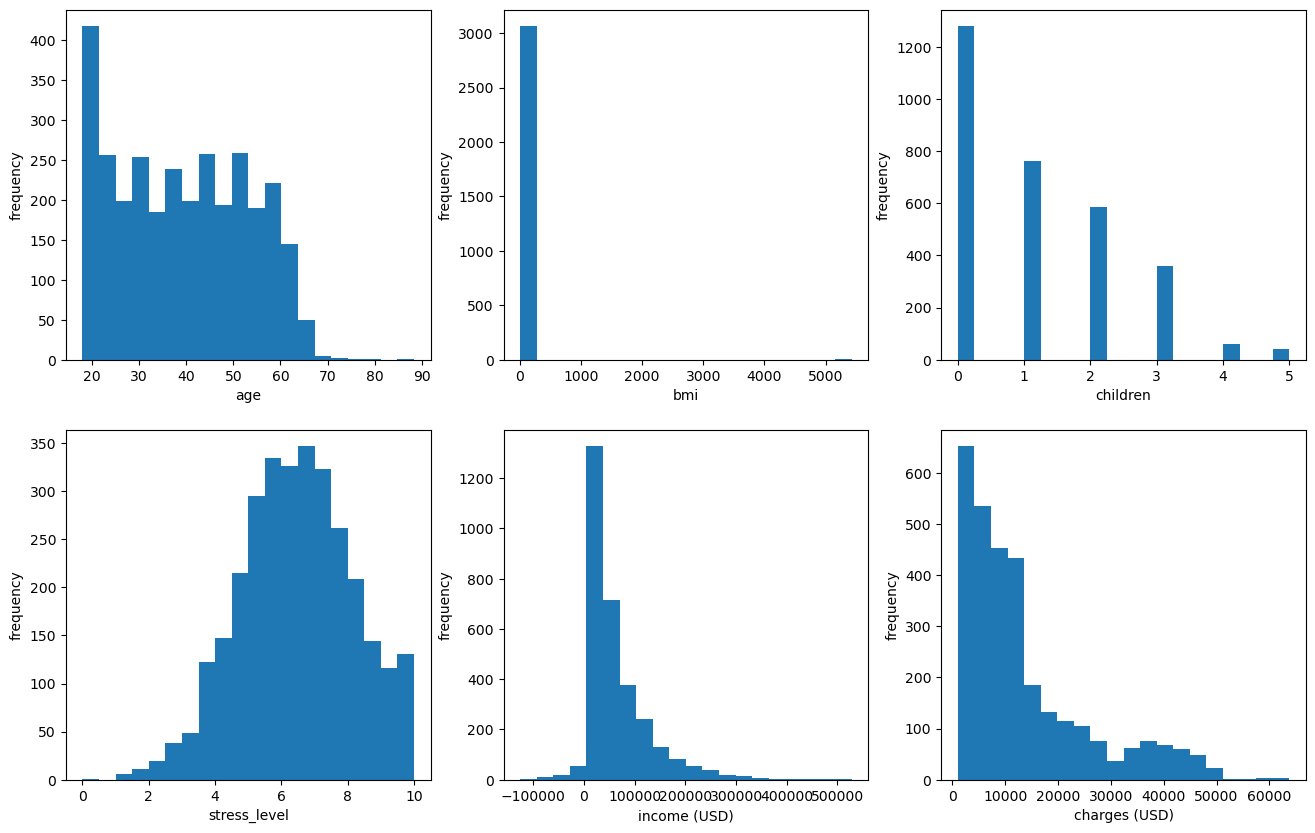

In [66]:
cols = ['age', 'bmi', 'children', 'stress_level', 'income (USD)', 'charges (USD)']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
for i in range(2):
    for j in range(3):
        col = cols[i * 3 + j]
        axes[i][j].hist(df[col], bins=20)
        axes[i][j].set_xlabel(col)
        axes[i][j].set_ylabel("frequency")

- bmi clearly have outliers
- income is super skewed, let's drop negative vals (for later imputation) and do log transform
- charges skewed too, same log there
- age is uniform, so let's bin it

In [67]:
(df['income (USD)'] <= 0).sum()

54

In [68]:

q1 = df.bmi.quantile(0.25)
q3 = df.bmi.quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
df.bmi = df.bmi.mask((df.bmi < lower) | (df.bmi > upper))

df['income (USD)'] = np.log1p(df['income (USD)'].apply(lambda x: max(x, 0)))
df['charges (USD)'] = np.log1p(df['charges (USD)'].apply(lambda x: max(x, 0)))

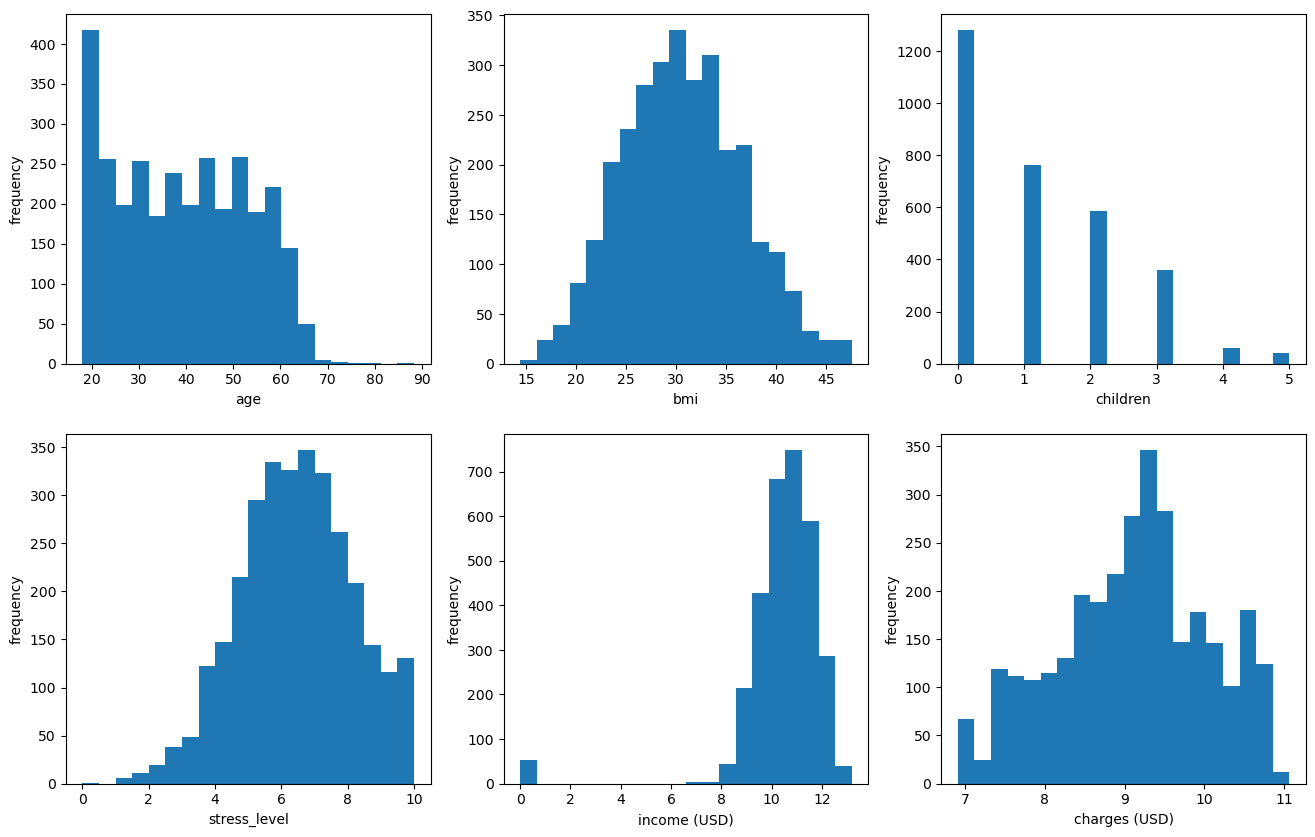

In [69]:
cols = ['age', 'bmi', 'children', 'stress_level', 'income (USD)', 'charges (USD)']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
for i in range(2):
    for j in range(3):
        col = cols[i * 3 + j]
        axes[i][j].hist(df[col], bins=20)
        axes[i][j].set_xlabel(col)
        axes[i][j].set_ylabel("frequency")

binning:

let's bin to <25, 25-35, 35-45 ... >65

In [70]:
cut = [15, 25, 35, 45, 55, 65, 100]
labels = ['15-25', '25-35', '35-45', '45-55', '55-65', '65+']
df.age = pd.cut(df.age, bins=cut, labels=labels)
df

,age,bmi,children,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),charges (USD),smoking,not_smoking,is_male,region_northwest,region_southeast,region_southwest
0,35-45,25.700,3,Single,Education,1.0,6.9,1.0,10.699312,9.116337,False,False,0,False,False,True
1,25-35,28.120,4,Engaged,IT Support,0.0,6.9,0.0,11.538154,9.974574,False,False,1,True,False,False
2,35-45,37.100,2,Single,Transportation,3.0,5.9,1.0,9.821758,8.905549,False,False,0,False,False,True
3,25-35,31.065,0,Single,Education,0.0,5.9,1.0,9.608384,7.901218,False,False,1,True,False,False
4,15-25,34.960,3,Married,Hospitality,0.0,8.6,2.0,9.653242,8.404611,False,False,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3093,45-55,34.210,2,Married,Finance,1.0,9.2,0.0,12.725259,10.697876,False,False,1,False,True,False
3094,15-25,31.350,4,Single,Retail,0.0,10.0,0.0,9.981626,8.425558,False,False,0,False,False,False
3095,35-45,23.870,5,Single,Transportation,1.0,5.8,2.0,10.501189,9.057574,False,False,0,False,True,False
3096,55-65,25.175,0,Single,Education,1.0,4.7,0.0,11.148742,9.386990,False,False,1,False,False,False


### Imputation time

In [71]:
df.isna().sum()

age                  23
bmi                  48
children              0
status                1
work_sector          36
physical_activity    79
stress_level          0
sleep_quality         0
income (USD)          0
charges (USD)        23
smoking               0
not_smoking           0
is_male               0
region_northwest      0
region_southeast      0
region_southwest      0
dtype: int64

let's drop all rows for charges (as it's target feature)

In [72]:
df = df[~df['charges (USD)'].isna()]

work sector: is something not imputable (as it's a job I will make Missing values 'Unknown')

In [73]:
df.loc[:, 'work_sector'] = df['work_sector'].fillna('Unknown')

age: we are missing only 23 vals, so let's fill with mode

In [74]:
df.loc[:, 'age'] = df['age'].fillna(df['age'].mode()[0])

physical activity: we are missing only 79 vals, fill with mode

In [75]:
df.loc[:, 'physical_activity'] = df['physical_activity'].fillna(df['physical_activity'].mode()[0])

status: same

In [76]:
df.loc[:, 'status'] = df['status'].fillna(df['status'].mode()[0])

now we can do imputation:
- split
- scale
- kNN impute

In [77]:
y = df.pop('charges (USD)')
X = df

In [78]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

Now we gonna scale + impute

In [79]:
cols = ['bmi', 'stress_level', 'income (USD)']
robust_scaler = sk.preprocessing.RobustScaler()
X_train[cols] = robust_scaler.fit_transform(X_train[cols])
X_test[cols] = robust_scaler.transform(X_test[cols])

In [80]:
kNN_imputer = sk.impute.KNNImputer(n_neighbors=3)
X_train[cols] = kNN_imputer.fit_transform(X_train[cols])
X_test[cols] = kNN_imputer.transform(X_test[cols])

In [81]:
X_train

,age,bmi,children,status,work_sector,physical_activity,stress_level,sleep_quality,income (USD),smoking,not_smoking,is_male,region_northwest,region_southeast,region_southwest
368,55-65,-1.135788,0,Married,Education,1.0,-0.625000,1.0,-0.145943,False,False,0,True,False,False
3097,35-45,0.316636,2,Married,Management,0.0,1.416667,0.0,1.095254,False,False,0,False,False,True
2352,15-25,-0.642728,0,Single,Education,1.0,-0.416667,2.0,-0.953818,False,False,1,True,False,False
2311,45-55,-0.963790,0,Engaged,Healthcare Support,2.0,-0.583333,1.0,-0.449531,False,False,1,False,False,False
1576,55-65,-0.264333,0,Single,Healthcare Support,2.0,0.875000,1.0,-0.159073,False,False,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,25-35,-0.528063,0,Single,Construction,3.0,-0.041667,2.0,0.166184,False,False,0,False,False,False
1103,55-65,-0.663240,2,Married,Education,1.0,0.500000,0.0,-0.829126,False,False,0,True,False,False
1138,15-25,0.171394,0,Single,Education,2.0,-0.416667,0.0,-1.415067,False,False,0,False,False,False
1305,15-25,-0.241400,0,Married,Management,1.0,0.583333,0.0,1.209586,False,False,1,False,False,False


In [82]:
X_train.isna().sum()

age                  0
bmi                  0
children             0
status               0
work_sector          0
physical_activity    0
stress_level         0
sleep_quality        0
income (USD)         0
smoking              0
not_smoking          0
is_male              0
region_northwest     0
region_southeast     0
region_southwest     0
dtype: int64

In [83]:
X_test.isna().sum()

age                  0
bmi                  0
children             0
status               0
work_sector          0
physical_activity    0
stress_level         0
sleep_quality        0
income (USD)         0
smoking              0
not_smoking          0
is_male              0
region_northwest     0
region_southeast     0
region_southwest     0
dtype: int64